In [64]:
# Importing Libraries
import ast
import numpy as np
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [65]:
df_us = df[df['job_country']== 'United States']

In [66]:
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [67]:
df_skills= df_us.explode('job_skills')

In [70]:
df_count=df_skills.groupby(['job_title_short','job_skills']).size()
df_count= df_count.reset_index(name='count')
df_count=df_count.sort_values(by='count',ascending=False)


In [71]:
job_titles=df_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

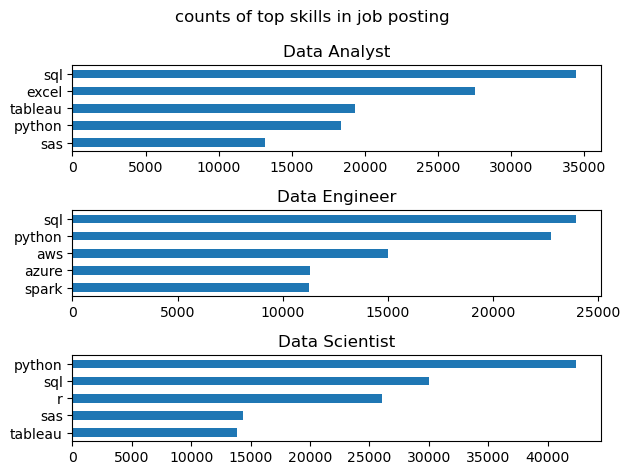

In [ ]:
fig, ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot =df_count[df_count['job_title_short'] == job_title].head(5)
    df_plot[::-1].plot(kind ='barh', x= 'job_skills', y='count', ax=ax[i], )
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
    fig.suptitle('counts of top skills in job posting ')
    fig.tight_layout()

In [86]:
df_job_title =df_us['job_title_short'].value_counts().reset_index(name='jobs total')
df_job_title

,job_title_short,jobs total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [89]:
df_skill_perct = pd.merge(df_count,df_job_title, how='left', on='job_title_short')

df_skill_perct['skill perct'] = 100 * df_skill_perct['count'] / df_skill_perct['jobs total']

df_skill_perct

,job_title_short,job_skills,count,jobs total,skill perct
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


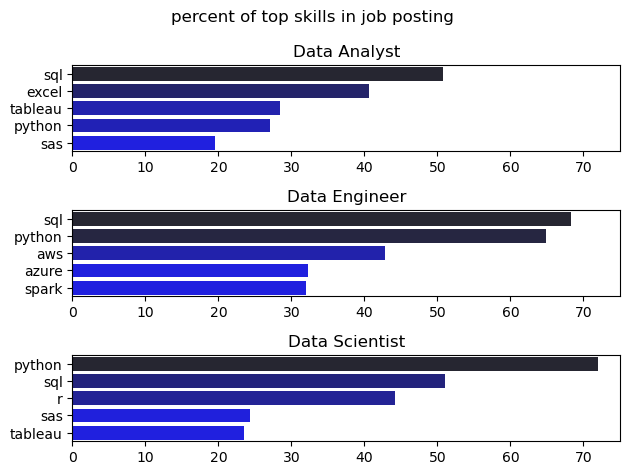

In [121]:
fig, ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skill_perct[df_skill_perct['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh' , x='job_skills' , y='skill perct', ax=ax[i])
    sns.barplot(data=df_plot, y='job_skills', x='skill perct', ax=ax[i], hue='count', palette='dark:b_r')

    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,75)
    ax[i].set_title(job_title)
    
    fig.suptitle('percent of top skills in job posting ')
    fig.tight_layout()
    plt.show


    